<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.883 · Aprendizaje por refuerzo</p>
<p style="margin: 0; text-align:right;">2021-1 · Máster universitario en Ciencia de datos (<i>Data science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# PEC 1 - Soluciones tabulares

En esta práctica implementaremos los diferentes métodos de aprendizaje por refuerzo vistos en las Partes I y II del curso. En concreto, nos centraremos en la definición de un entorno e implementaremos los diferentes métodos para buscar una solución óptima del problema.

**<u>Importante</u>**: 

1. Esta PEC debe realizarse de **forma estrictamente individual**. Cualquier indicio de copia será penalizado con un suspenso (D) para todas las partes implicadas y la posible evaluación negativa de la asignatura de forma íntegra.

2. Es necesario que el estudiante indique **todas las fuentes que ha utilizado para la realización de la PEC**. De no ser así, se considerará que el estudiante ha cometido plagio, siendo penalizado con un suspenso (D) y la posible evaluación negativa de la asignatura de forma íntegra.

3. La entrega debe hacerse en **formato notebook y en formato html** donde se vea el código, los resultados y comentarios de cada ejercicio. Es decir, deben entregarse dos ficheros: uno con extensión .ipynb y otro .html. Para exportar el notebook a html puede hacerse desde el menú File $\to$ Download as $\to$ HTML.


## 0. El entorno __CliffWalking__

El entorno __CliffWalking__ consiste en un agente que se mueve en una cuadrícula de dimensiones 12x4 (ancho x alto). En cada paso, el agente tiene 4 opciones de acción o movimiento: ARRIBA, DERECHA, ABAJO, IZQUIERDA. La posición de cada casilla viene dada por una pareja de números naturales [x, y], donde la posición de la esquina de arriba a la izquierda sería el origen de coordenadas [0, 0]. El agente siempre sale de la misma casilla [0, 3] (esquina abajo izquierda) y el juego termina cuando el agente llega a la casilla de llegada [11, 3] (esquina abajo derecha).

El entorno se corresponde con el ejemplo 'Cuadrícula con precipicio' explicado en la sección 3.2.1. del módulo "Métodos de Diferencia Temporal". El problema radica en que en todas las casillas la recompensa inmediata es R=-1 excepto en las casillas que unen en línea recta la casilla de salida con la de llegada, casillas  [1, 3] a  [10, 3]. En estas casillas, que simulan un precipicio, la recompensa es R=-100 y se vuelve a la casilla inicial.

<img src="CliffWalking.png">
Fuente: Sutton & Barto, 2018

El código para implementar este entorno, que se encuentra disponible en el fichero adjunto `cliff_env.py`, ha sido adaptado del siguiente enlace:
https://pypi.org/project/gym-gridworlds/

Vamos a empezar cargando el entorno y ver qué características tiene, ejecutando un episodio de prueba.

### 0.1. Carga de datos
El siguiente código carga los paquetes necesarios para ejecutar el ejemplo, crea el entorno mediante la instanciación de un objeto de la clase `CliffEnv` (importada del archivo adjunto `cliff_env.py`) e imprime por pantalla la dimensión del espacio de acciones (0=arriba, 1=derecha, 2=abajo y 3=izquierda), el espacio de observaciones (una tupla que indica la posición del agente en la cuadrícula) y el rango de la variable de recompensa (cuyo valor es -1 o -100 dependiendo de la casilla visitada y que por tanto va de menos infinito a más infinito).

In [1]:
!pip install gym

In [2]:
import gym
import numpy as np
import cliff_env as cenv

env=cenv.CliffEnv()
print("Action space is {} ".format(env.action_space))
print("Observation space is {} ".format(env.observation_space))
print("Reward range is {} ".format(env.reward_range))

Action space is Discrete(4) 
Observation space is Tuple(Discrete(12), Discrete(4)) 
Reward range is (-inf, inf) 


### 0.2. Ejecución de un episodio

A continuación, realizaremos la ejecución de un episodio del entorno CliffWalking utilizando un agente que selecciona las acciones de forma aleatoria.


In [3]:
# Inicializamos el entorno
obs = env.reset()
t, total_reward, done = 0, 0, False

print("Obs inicial: {} ".format(obs))

switch_action = {
        0: "U",
        1: "R",
        2: "D",
        3: "L",
    }

while not done:
    
    # Elegir una acción aleatoria (ésta es la implementación del agente)
    action = env.action_space.sample()
    
    # Ejecutar la acción y esperar la respuesta del entorno
    new_obs, reward, done, info = env.step(action)
    
    # Imprimir time-step
    print("Action: {} -> Obs: {} and reward: {}".format(switch_action[action], new_obs, reward))
    
    # Actualizar variables
    obs = new_obs
    total_reward += reward
    t += 1
    
print("Episode finished after {} timesteps and reward was {} ".format(t, total_reward))
env.close()

Obs inicial: (0, 3) 
Action: L -> Obs: (0, 3) and reward: -1
Action: L -> Obs: (0, 3) and reward: -1
Action: U -> Obs: (0, 2) and reward: -1
Action: U -> Obs: (0, 1) and reward: -1
Action: D -> Obs: (0, 2) and reward: -1
Action: L -> Obs: (0, 2) and reward: -1
Action: U -> Obs: (0, 1) and reward: -1
Action: D -> Obs: (0, 2) and reward: -1
Action: L -> Obs: (0, 2) and reward: -1
Action: L -> Obs: (0, 2) and reward: -1
Action: R -> Obs: (1, 2) and reward: -1
Action: U -> Obs: (1, 1) and reward: -1
Action: L -> Obs: (0, 1) and reward: -1
Action: U -> Obs: (0, 0) and reward: -1
Action: L -> Obs: (0, 0) and reward: -1
Action: U -> Obs: (0, 0) and reward: -1
Action: R -> Obs: (1, 0) and reward: -1
Action: D -> Obs: (1, 1) and reward: -1
Action: R -> Obs: (2, 1) and reward: -1
Action: L -> Obs: (1, 1) and reward: -1
Action: R -> Obs: (2, 1) and reward: -1
Action: L -> Obs: (1, 1) and reward: -1
Action: R -> Obs: (2, 1) and reward: -1
Action: D -> Obs: (2, 2) and reward: -1
Action: L -> Obs: (

## 1. Modificación del entorno (1,5 puntos)
El entorno CliffWalking tiene varios parámetros que pueden ser modificados:


*   La dimensión de la cuadrícula.
*   La posición del precipicio.
*   La posición de las casillas de salida y de llegada.
*   La recompensa inmediata.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 1.1</strong> (0,75 puntos)</div>

Modificar el codigo de CliffWalking (fichero adjunto `cliff_env.py`) para que represente las propiedades de la cuadrícula descritas a continuación.

- Cuadrícula 5x11
- Posición del precipicio = Casillas [1,0], [2,0], [3,0], [4,0], [5,0], [6,0], [7,0], [8,0] y [9,0]
- Casilla de inicio [0,0]
- Casilla final [10,0]
- Recompensa en casillas normales = -1
- Recompensa en casillas del precipicio = -500 (y volvemos a la casilla de salida)

Guardar el entorno modificado en el archivo `cliff_env_v2.py`, en la misma carpeta que el original. Este archivo debe entregarse junto a los archivos de este notebook (.ipynb y .html).

In [1]:
import gym
import numpy as np
import cliff_env_v2 as ce2

env=ce2.CliffEnv()
print("Action space is {} ".format(env.action_space))
print("Observation space is {} ".format(env.observation_space))
print("Reward range is {} ".format(env.reward_range))

Action space is Discrete(4) 
Observation space is Tuple(Discrete(11), Discrete(5)) 
Reward range is (-inf, inf) 


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 1.2</strong> (0,25 puntos)</div>

A continuación, implementar un agente que lleve a cabo una política aleatoria. Comprobar que las casillas visitadas y las recompensas recibidas se corresponden con las acciones y el entorno programado.

Mostrar la trayectoria seguida por el agente. No es necesario graficarla, tan sólo mostrar las coordenadas de las casillas visitadas en orden y las recompensas recibidas.

In [5]:
# Environment reset
obs = env.reset()
t, total_reward, done = 0, 0, False

print("Obs inicial: {} ".format(obs))

switch_action = {
        0: "U",
        1: "R",
        2: "D",
        3: "L"
    }

Obs inicial: (0, 0) 


In [6]:
# Escribir el código aquí

while not done:
    # Elegir una acción aleatoria (ésta es la implementación del agente)
    action = env.action_space.sample()

    # Ejecutar la acción y esperar la respuesta del entorno
    new_obs, reward, done, info = env.step(action)

    # Imprimir time-step
    print("Acción: {} -> Observación: {} y recompensa: {}".format(switch_action[action], new_obs, reward))

    # Actualizar variables
    obs = new_obs
    total_reward += reward
    t += 1

print("Episodío finalizado después de {} pasos y cuya recompensa fue {}".format(t, total_reward))
env.close()

Acción: U -> Observación: (0, 0) y recompensa: -1
Acción: U -> Observación: (0, 0) y recompensa: -1
Acción: R -> Observación: (0, 0) y recompensa: -500
Acción: L -> Observación: (0, 0) y recompensa: -1
Acción: D -> Observación: (0, 1) y recompensa: -1
Acción: R -> Observación: (1, 1) y recompensa: -1
Acción: D -> Observación: (1, 2) y recompensa: -1
Acción: L -> Observación: (0, 2) y recompensa: -1
Acción: U -> Observación: (0, 1) y recompensa: -1
Acción: D -> Observación: (0, 2) y recompensa: -1
Acción: U -> Observación: (0, 1) y recompensa: -1
Acción: R -> Observación: (1, 1) y recompensa: -1
Acción: L -> Observación: (0, 1) y recompensa: -1
Acción: U -> Observación: (0, 0) y recompensa: -1
Acción: D -> Observación: (0, 1) y recompensa: -1
Acción: R -> Observación: (1, 1) y recompensa: -1
Acción: R -> Observación: (2, 1) y recompensa: -1
Acción: U -> Observación: (0, 0) y recompensa: -500
Acción: U -> Observación: (0, 0) y recompensa: -1
Acción: R -> Observación: (0, 0) y recompensa:

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 1.3</strong> (0,5 puntos)</div>

A continuación, implementar un agente que lleve a cabo la política óptima determinista, es decir, que partiendo de la casilla inicial [0,0] llegue a la casilla final [10,0] en el menor número de pasos posible. ¿Cuál es el valor del número de pasos mínimos?

Mostrar la trayectoria seguida por el agente y el retorno obtenido. No es necesario graficarla, tan sólo mostrar las coordenadas de las casillas visitadas en orden.

In [7]:
# Environment reset
obs = env.reset()
t, total_reward, done = 0, 0, False

print("Obs inicial: {} ".format(obs))

switch_action = {
        0: "U",
        1: "R",
        2: "D",
        3: "L"
    }
# Definiendo la política óptima determinista
optimal_policy = [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]

Obs inicial: (0, 0) 


In [8]:
# Escribir el código aquí

while not done:
    # Elegir una acción óptima
    action = optimal_policy[t]
    print("Acción: {} en el paso {}".format(switch_action[action], t))

    # Ejecutar la acción y esperar la respuesta del entorno
    new_obs, reward, done, info = env.step(action)

    # Imprimir time-step
    print("Observación: {} -> State: {}".format(new_obs, (new_obs[0] + new_obs[1] * env.width)))
    print("Acción: {} -> Observación: {} y recompensa: {}".format(switch_action[action], new_obs, reward))

    # Actualizar variables
    obs = new_obs
    total_reward += reward
    t += 1

print("Episodío finalizado después de {} pasos y cuya recompensa fue {}".format(t, total_reward))
env.close()


Acción: D en el paso 0
Observación: (0, 1) -> State: 11
Acción: D -> Observación: (0, 1) y recompensa: -1
Acción: R en el paso 1
Observación: (1, 1) -> State: 12
Acción: R -> Observación: (1, 1) y recompensa: -1
Acción: R en el paso 2
Observación: (2, 1) -> State: 13
Acción: R -> Observación: (2, 1) y recompensa: -1
Acción: R en el paso 3
Observación: (3, 1) -> State: 14
Acción: R -> Observación: (3, 1) y recompensa: -1
Acción: R en el paso 4
Observación: (4, 1) -> State: 15
Acción: R -> Observación: (4, 1) y recompensa: -1
Acción: R en el paso 5
Observación: (5, 1) -> State: 16
Acción: R -> Observación: (5, 1) y recompensa: -1
Acción: R en el paso 6
Observación: (6, 1) -> State: 17
Acción: R -> Observación: (6, 1) y recompensa: -1
Acción: R en el paso 7
Observación: (7, 1) -> State: 18
Acción: R -> Observación: (7, 1) y recompensa: -1
Acción: R en el paso 8
Observación: (8, 1) -> State: 19
Acción: R -> Observación: (8, 1) y recompensa: -1
Acción: R en el paso 9
Observación: (9, 1) -> 

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Comentarios:</strong>
<br><br>
El número mínimo de pasos para el agente siguiendo una política óptima determinista es de 12.
<br><br>
La recompensa total es: -12
</div>


## 2. Programación Dinámica (2.5 puntos)

Dado que el entorno es determinista, es factible encontrar una política óptima (que en este caso es única) que consiga el mayor retorno (y por tanto la trayectoria más corta).

El objetivo de este apartado es realizar una estimación de la política óptima mediante los métodos de Programación Dinámica, en concreto estudiaremos el algoritmo *Iteración del valor*.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 2.1</strong> (1 puntos)</div>

Implementar el Algoritmo 3 explicado en el módulo "Programación Dinámica" utilizando los siguientes parámetros:
    
- Theta = 0.001
- Factor de descuento (*discount factor*) = 1

In [128]:
# Función adaptada desde: 
# https://github.com/dennybritz/reinforcement-learning/blob/master/DP/Value%20Iteration%20Solution.ipynb
# https://github.com/udacity/deep-reinforcement-learning/blob/master/dynamic-programming/Dynamic_Programming_Solution.ipynb

def value_iteration(env, number_of_states, number_of_actions, theta=0.0, discount_factor=1.0, delta=1.0):
    # Vector del tamaño del número total de estados que se llenan con valores 0
    V = np.zeros(number_of_states)
    policy = np.zeros([number_of_states, number_of_actions])

    # Se ejecuta mientras el valor delta sea mayor a theta
    while delta > theta:
        delta = 0
        # Se ejecuta para cada estado del entorno, es decir del 0 al 54.
        for state in range(number_of_states):

            # El estado 10 no se considera para el cálculo de la función de valor
            # Porque es el estado terminal, por tanto se salta el bucle al siguiente
            # estado con la sentencia: continue
            if state == 10:
                continue

            # Obtengo las coordenadas del estado en la forma (x, y)
            # Es decir, el primer valor (x) corresponde al valor a lo ancho (de 0 a 10, en este caso)
            # Para el segundo valor (y) corresponde el valor a lo alto (de 0 a 4, en este caso)
            cell_state = np.unravel_index(state, (env.width, env.height), order='F')

            # Se copia el valor del estado antes de calcular
            # el valor del siguiente según las acciones ejecutadas.
            v = V[state]

            # Q es un vector con los valores q para cada estado-acción
            Q = np.zeros(number_of_actions)

            # Para cada acción (0: Arriba, 1: Derecha, 2: Abajo, 3: Izquierda)
            for action in range(number_of_actions):
                # Se setea el estado en cada iteración ya que el método env.step lo cambia internamente cuando se lo llama
                # Por tanto, se debe restablecer el estado para que se termine de calcular los valores q de las demás acciones
                env.set_state(cell_state)
                # Se ejecuta el método step del entorno y se obtiene las variables en forma de tupla (sin paréntesis).
                # Las variables obtenidas son:
                # 1) new_state: tupla en forma de coordenadas (x, y) del siguiente estado luego de ejecutada la acción.
                # Esta coordenada además queda definida como el estado actual en el entorno,
                # por ende es necesario volver a cambiarlo en cada iteración.
                # 2) recompensa: es el valor que establece y devuelve el entorno al agente cuando ejecuta la acción
                # 3) finished: es una variable booleana que indica si se alcanzó un o no el estado terminal.
                # 4) inf: variable opcional
                new_state, recompensa, finished, inf = env.step(action)
                # Se convierte el nuevo estado (new_state) en forma de tupla a un estado numérico que se corresponda con el formato que vector V
                next_state = (new_state[0] + new_state[1] * env.width)
                # Se llena con el resultado de la función valor para cada acción ejecutada en el estado.
                # Se usa el factor de descuento establecido en los parámetros del ejercicio.
                # Además la probabilidad para la transición de un estado a otro siempre será de 1.0
                # Eso valores calculados para acción se almacenan en el vector Q.
                # En el caso que un estado-acción tengan varios valores de probabilidades se deben sumar.
                Q[action] += 1.0 * (recompensa + discount_factor * V[next_state])

            V[state] = max(Q)
            delta = max(delta, abs(v - V[state]))

            # En caso que el vector que guarda la mejor acción para cada estado ya contenga un valor para alguna de las acciones
            # se aplica un reset para ese vector (estado) que corresponde a la política. De esa manera garantizamos que al final
            # quede la mejor acción en la última iteración del algoritmo.
            policy[state, ] = 0.0
            # Obtengo la mejor acción entre los valores Q calculados para obtener la política
            best_action = np.argmax(Q)
            # Lleno la matriz con la mejor acción para cada estado
            policy[state, best_action] = 1.0
            
    env.close()        
    return policy, V

In [129]:
# Escribir el código aquí
THETA = 0.001
DISCOUNT_FACTOR = 1.0
DELTA = 1.0 #Valor temporal inicial, para cumplir la condición

env_x = env.observation_space.__getitem__(0).n
env_y = env.observation_space.__getitem__(1).n

N_STATES = env_x * env_y       # number of states
N_ACTIONS = env.action_space.n # number of actions

policy_DP, V_DP = value_iteration(env, number_of_states=N_STATES, number_of_actions=N_ACTIONS, \
                                  theta=THETA, discount_factor=DISCOUNT_FACTOR, delta=DELTA)

    
print("Política determinista (Dynamic Programming):")
print(policy_DP)
print("")

print("Política Reshaped Grid (0=UP, 1=RIGHT, 2=DOWN, 3=LEFT): ")
print(np.reshape(np.argmax(policy_DP, axis=1), (env.height, env.width)))
print("")

print("Función Valor:")
print(V_DP)
print("")

print("Función Valor Grid Reshaped:")
print(V_DP.reshape(env.height, env.width))
print("")

Política determinista (Dynamic Programming):
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

Política Reshaped Grid (0=UP, 1=RIGHT, 2=DOWN, 3=LEFT): 
[[2 2 2 2 2 2 2 2 2 1 0]
 [1 1 1 1 1 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 0

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 2.2</strong> (0.5 puntos)</div>

Implementar una función que imprima por pantalla los valores finales de la función de valor para cada celda.

Se muestra a continuación una imagen de ejemplo para la cuadrícula del entorno modificado de 11x5.

<img src="ValueFunction.png">

In [130]:
# Función adaptada desde: 
# https://github.com/jcasasr/Aprendizaje-por-refuerzo/blob/main/M06/M06-E2%20-%20TD%20learning%20en%20WindyGridWorld%20%5Bes%5D.ipynb

# función que muestra los valores de la función de estado V(s) en la cuadricula
def print_values(V, width, height):
    # Escribir el código aquí
    switch_action = {
        0: "U",
        1: "R",
        2: "D",
        3: "L"
    }
    for i in range(height):
        print("---------------------------------------------------------------------------------------------------------")
        for j in range(width):
            state_index = j + (i * width)
            print("  %s  |" % V[state_index], end="")
        print("")

    print("---------------------------------------------------------------------------------------------------------")

In [131]:
print("values:")
print_values(V_DP, 11, 5)

values:
---------------------------------------------------------------------------------------------------------
  -12.0  |  -11.0  |  -10.0  |  -9.0  |  -8.0  |  -7.0  |  -6.0  |  -5.0  |  -4.0  |  -1.0  |  0.0  |
---------------------------------------------------------------------------------------------------------
  -11.0  |  -10.0  |  -9.0  |  -8.0  |  -7.0  |  -6.0  |  -5.0  |  -4.0  |  -3.0  |  -2.0  |  -1.0  |
---------------------------------------------------------------------------------------------------------
  -12.0  |  -11.0  |  -10.0  |  -9.0  |  -8.0  |  -7.0  |  -6.0  |  -5.0  |  -4.0  |  -3.0  |  -2.0  |
---------------------------------------------------------------------------------------------------------
  -13.0  |  -12.0  |  -11.0  |  -10.0  |  -9.0  |  -8.0  |  -7.0  |  -6.0  |  -5.0  |  -4.0  |  -3.0  |
---------------------------------------------------------------------------------------------------------
  -14.0  |  -13.0  |  -12.0  |  -11.0  |  -10.0  | 

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 2.3</strong> (0.5 puntos)</div>

Implementar una función que imprima por pantalla la política óptima encontrada para cada celda. 

Se muestra a continuación una imagen de ejemplo para la cuadrícula del entorno modificado de 11x5.

<img src="Policy.png">

In [132]:
# Función adaptada desde: 
# https://github.com/jcasasr/Aprendizaje-por-refuerzo/blob/main/M06/M06-E2%20-%20TD%20learning%20en%20WindyGridWorld%20%5Bes%5D.ipynb

def print_policy_DP(policy, width, height):
    # Escribir el código aquí
    switch_action = {
        0: "U",
        1: "R",
        2: "D",
        3: "L"
    }
    # Convierto la matriz de la política determinista a un vector para poder iterar en sus estados.
    policy_max = np.argmax(policy, axis=1)

    for i in range(height):
        print("--------------------------------------------------------------------")
        for j in range(width):
            state_index = j + (i * width) # Defino el índice del estado en el vector de la política
            a = switch_action[policy_max[state_index]] # Mapeo la letra correspondiente a la acción según el índice que guarda el vector de la política.
            print("  %s  |" % a, end="")
        print("")

    print("--------------------------------------------------------------------")

In [133]:
print("policy:")
print_policy_DP(policy_DP, 11, 5)

policy:
--------------------------------------------------------------------
  D  |  D  |  D  |  D  |  D  |  D  |  D  |  D  |  D  |  R  |  U  |
--------------------------------------------------------------------
  R  |  R  |  R  |  R  |  R  |  R  |  R  |  R  |  R  |  R  |  U  |
--------------------------------------------------------------------
  U  |  U  |  U  |  U  |  U  |  U  |  U  |  U  |  U  |  U  |  U  |
--------------------------------------------------------------------
  U  |  U  |  U  |  U  |  U  |  U  |  U  |  U  |  U  |  U  |  U  |
--------------------------------------------------------------------
  U  |  U  |  U  |  U  |  U  |  U  |  U  |  U  |  U  |  U  |  U  |
--------------------------------------------------------------------


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 2.4</strong> (0.5 puntos)</div>

Ejecutar un episodio con la política óptima encontrada y mostrar la trayectoria del agente y el retorno obtenido.

In [134]:
# Función adaptada desde: 
# https://github.com/jcasasr/Aprendizaje-por-refuerzo/blob/main/M06/M06-E2%20-%20TD%20learning%20en%20WindyGridWorld%20%5Bes%5D.ipynb

def execute_episode_DP(policy, env):
    # Escribir el código aquí
    state = env.reset()
    t, total_reward, done = 0, 0, False
    print("Estado inicial: {} ".format(state))

    switch_action = {
        0: "U",
        1: "R",
        2: "D",
        3: "L",
    }

    for t in range(100): # limitamos el número de time-steps del episodio a 100

        state_index = state[0] + (state[1] * env.width) # Defino el índice del estado en el vector de la política
        # Elegimos la política óptima en cada caso (el máximo de la política Epsilon-Greedy)
        actions_arr = np.array(policy[state_index])
        optimal_action = actions_arr.argmax() # Obtengo la mejor acción entre los valores del vector que obtengo desde la política para el estado

        # Ejecutamos la acción y esperamos la respuesta del entorno
        new_state, reward, done, _ = env.step(optimal_action)
        state = new_state
        print("Acción: {} -> Nuevo estado: {} and recompensa: {}".format(switch_action[optimal_action], state, reward))

        total_reward += reward
        t += 1
        if done:
            break

    print("Episodio finalizado después de {} timesteps y con una recompensa total de {} ".format(t, total_reward))
    env.close()

In [135]:
execute_episode_DP(policy_DP, env)

Estado inicial: (0, 0) 
Acción: D -> Nuevo estado: (0, 1) and recompensa: -1
Acción: R -> Nuevo estado: (1, 1) and recompensa: -1
Acción: R -> Nuevo estado: (2, 1) and recompensa: -1
Acción: R -> Nuevo estado: (3, 1) and recompensa: -1
Acción: R -> Nuevo estado: (4, 1) and recompensa: -1
Acción: R -> Nuevo estado: (5, 1) and recompensa: -1
Acción: R -> Nuevo estado: (6, 1) and recompensa: -1
Acción: R -> Nuevo estado: (7, 1) and recompensa: -1
Acción: R -> Nuevo estado: (8, 1) and recompensa: -1
Acción: R -> Nuevo estado: (9, 1) and recompensa: -1
Acción: R -> Nuevo estado: (10, 1) and recompensa: -1
Acción: U -> Nuevo estado: (10, 0) and recompensa: -1
Episodio finalizado después de 12 timesteps y con una recompensa total de -12 


## 3. Métodos de Montecarlo (2 puntos)

El objetivo de este apartado es realizar una estimación de la política óptima mediante los métodos de Montecarlo, en concreto estudiaremos el algoritmo *On-policy every-visit MC control (para políticas $\epsilon$-soft)*.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 3.1</strong> (1 punto)</div>

A partir del Algoritmo 3 explicado en el módulo "Métodos de Montecarlo", modificarlo para implementar el algoritmo *On-policy every-visit MC control (para políticas $\epsilon$-soft)* utilizando los siguientes parámetros:
    
- Número de episodios = 100000
- Epsilon inicial = 1
- Factor de decaimiento de epsilon (*epsilon decay*) = 0.999
- Actualizar epsilon según: $$\textrm{max}(\epsilon · \epsilon_{\textrm{decay}}, 0.01)$$
- Factor de descuento = 1

In [2]:
# Funciones tomadas desde:
# https://torres.ai/capitulo-6-obtencion-de-politicas-optimas/

# Escribir el código aquí
def get_probs(Q_s, epsilon, n_actions):
    policy_s = np.ones(n_actions) * epsilon / n_actions
    max_action = np.argmax(Q_s)
    policy_s[max_action] = 1.0 - epsilon + (epsilon / n_actions)
    return policy_s

def generate_episode_from_Q(env, Q, epsilon, n_actions, max_steps=1000):
    episodio = []
    state = env.reset()

    for t in range(max_steps):
        probabilidades = get_probs(Q[state], epsilon, n_actions)
        accion = np.random.choice(np.arange(n_actions), p=probabilidades) if state in Q else env.action_space.sample()

        next_state, reward, done, info = env.step(accion)
        episodio.append((state, accion, reward))
        state = next_state
        if done:
            break
    return episodio

In [3]:
# Funciones tomadas desde:
# https://medium.com/aprendizaje-por-refuerzo/5-evaluaci%C3%B3n-de-pol%C3%ADticas-con-monte-carlo-a6d70d1db7d4

from collections import defaultdict
from tqdm.auto import tqdm

# Escribir el código aquí
def MC_prediction_Q(env, num_episodes, discount_factor=1.0, eps=1.0, eps_decay=0.999):
    EPSILON_MIN = 0.01
    num_actions = env.action_space.n
    returns_sum = defaultdict(lambda: np.zeros(num_actions))
    N = defaultdict(lambda: np.zeros(num_actions))
    Q = defaultdict(lambda: np.zeros(num_actions))

    epsilon = eps
    t = tqdm(range(1, num_episodes+1))
    for episode_number in t:

        epsilon = max(epsilon * eps_decay, EPSILON_MIN)
        t.set_postfix(epsilon=epsilon)
        episode_generated = generate_episode_from_Q(env, Q, epsilon, num_actions)
        states, actions, rewards = zip(*episode_generated)

        for i, estado in enumerate(states):
            action = actions[i]
            returns_sum[estado][actions[i]] += sum(r * discount_factor**k for k, r in enumerate(rewards[i:]))
            N[estado][action] += 1.0
            Q[estado][action] = returns_sum[estado][action] / N[estado][action]

    politica_mc = dict((est, np.argmax(actions)) for est, actions in Q.items())
    return politica_mc, Q

In [4]:
# Declarar los parámetros
NUMBER_OF_EPISODES = 100000
EPSILON_START = 1.0
EPSILON_DECAY = 0.999
DISCOUNT_FACTOR_MC = 1.0

policy_MC, Q_MC = MC_prediction_Q(env, num_episodes=NUMBER_OF_EPISODES, discount_factor=DISCOUNT_FACTOR_MC, eps=EPSILON_START, eps_decay=EPSILON_DECAY)

env.close()

print("Política MC:")
print(policy_MC)
print("")

print("Q values:")
print(Q_MC)
print("")

  0%|          | 0/100000 [00:00<?, ?it/s]

Política MC:
{(0, 0): 2, (0, 1): 2, (0, 2): 1, (0, 3): 2, (1, 3): 2, (1, 2): 1, (0, 4): 3, (1, 4): 2, (1, 1): 3, (2, 4): 1, (2, 2): 2, (2, 3): 1, (3, 3): 2, (3, 4): 1, (3, 2): 2, (4, 2): 1, (4, 1): 1, (4, 4): 0, (5, 4): 1, (5, 3): 0, (5, 2): 1, (6, 2): 1, (7, 2): 2, (7, 3): 1, (6, 3): 1, (4, 3): 1, (6, 4): 1, (7, 4): 0, (8, 3): 1, (5, 1): 2, (6, 1): 2, (7, 1): 2, (2, 1): 2, (3, 1): 2, (8, 2): 1, (9, 2): 1, (9, 1): 1, (8, 1): 1, (8, 4): 0, (9, 4): 3, (10, 4): 1, (10, 3): 0, (9, 3): 1, (10, 2): 0, (10, 1): 0}

Q values:
defaultdict(<function MC_prediction_Q.<locals>.<lambda> at 0x7f92450c3790>, {(0, 0): array([-10395.32355424, -10894.41375593,  -1033.51925195, -10252.20160069]), (0, 1): array([-8137.78894036, -8384.61206387,  -727.80907342, -7675.07664884]), (0, 2): array([-895.72330187, -452.17596419, -995.39488497, -513.19019726]), (0, 3): array([-6960.36105578, -7273.76907109,  -688.06755673, -7102.93098312]), (1, 3): array([-8530.39194139, -8396.39819319,  -791.12090607, -8733.179230

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 3.2</strong> (0.5 puntos)</div>

Implementar una función que imprima por pantalla la política óptima encontrada para cada celda. 

In [7]:
# Función adaptada desde: 
# https://github.com/jcasasr/Aprendizaje-por-refuerzo/blob/main/M05/M05-E1%20-%20MonteCarlo%20en%20WindyGridWorld%20%5Bes%5D.ipynb

def print_policy_MC(policy, width, height):
    # Escribir el código aquí
    
    switch_action = {
        0: "U",
        1: "R",
        2: "D",
        3: "L"
    }
    
    for y in range(height):
        print('----'*width)
        for x in range(width):
            state = (x, y)
            action = policy.get(state, None)
            if action is not None:
                print(' {} |'.format(switch_action[action]), end="")
            else:
                print('   |', end="")
        print("")

In [8]:
print_policy_MC(policy_MC,11,5)

--------------------------------------------
 D |   |   |   |   |   |   |   |   |   |   |
--------------------------------------------
 D | L | D | D | R | D | D | D | R | R | U |
--------------------------------------------
 R | R | D | D | R | R | R | D | R | R | U |
--------------------------------------------
 D | D | R | D | R | U | R | R | R | R | U |
--------------------------------------------
 L | D | R | R | U | R | R | U | U | L | R |


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 3.3</strong> (0.5 puntos)</div>

Ejecutar un episodio con la política óptima encontrada y mostrar la trayectoria del agente y el retorno obtenido.

In [11]:
# Función adaptada desde: 
# https://github.com/jcasasr/Aprendizaje-por-refuerzo/blob/main/M05/M05-E1%20-%20MonteCarlo%20en%20WindyGridWorld%20%5Bes%5D.ipynb

def execute_episode_MC(policy, env):
    # Escribir el código aquí
    
    switch_action = {
        0: "U",
        1: "R",
        2: "D",
        3: "L"
    }
    
    episode = []
    obs = env.reset()
    total_reward, done = 0, False
    max_steps = 1000
    
    for t in range(max_steps):
        action = policy[obs]
        
        new_obs, reward, done, _ = env.step(action)
        episode.append((obs, action, reward))
        print("Action: {} -> Obs: {}  Obs: {} and reward: {}".format(switch_action[action], obs, new_obs, reward))
        obs = new_obs
        if done:
            break
        obs = new_obs
        total_reward += reward
    
    print("Episode finished after {} timesteps and reward was {} ".format(t, total_reward))

In [12]:
execute_episode_MC(policy_MC,env)

Action: D -> Obs: (0, 0)  Obs: (0, 1) and reward: -1
Action: D -> Obs: (0, 1)  Obs: (0, 2) and reward: -1
Action: R -> Obs: (0, 2)  Obs: (1, 2) and reward: -1
Action: R -> Obs: (1, 2)  Obs: (2, 2) and reward: -1
Action: D -> Obs: (2, 2)  Obs: (2, 3) and reward: -1
Action: R -> Obs: (2, 3)  Obs: (3, 3) and reward: -1
Action: D -> Obs: (3, 3)  Obs: (3, 4) and reward: -1
Action: R -> Obs: (3, 4)  Obs: (4, 4) and reward: -1
Action: U -> Obs: (4, 4)  Obs: (4, 3) and reward: -1
Action: R -> Obs: (4, 3)  Obs: (5, 3) and reward: -1
Action: U -> Obs: (5, 3)  Obs: (5, 2) and reward: -1
Action: R -> Obs: (5, 2)  Obs: (6, 2) and reward: -1
Action: R -> Obs: (6, 2)  Obs: (7, 2) and reward: -1
Action: D -> Obs: (7, 2)  Obs: (7, 3) and reward: -1
Action: R -> Obs: (7, 3)  Obs: (8, 3) and reward: -1
Action: R -> Obs: (8, 3)  Obs: (9, 3) and reward: -1
Action: R -> Obs: (9, 3)  Obs: (10, 3) and reward: -1
Action: U -> Obs: (10, 3)  Obs: (10, 2) and reward: -1
Action: U -> Obs: (10, 2)  Obs: (10, 1) and

## 4. Métodos de Diferencia Temporal (2 puntos)

El objetivo de este apartado es realizar una estimación de la política óptima mediante los métodos de Diferencia Temporal en el entorno CliffWalking modificado anteriormente. Concretamente nos centraremos en el método SARSA.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 4.1</strong> (1 punto)</div>

Implementar el algoritmo *SARSA* explicado en el modulo "Aprendizaje por Diferencia Temporal" utilizando los siguientes parámetros:
    
- Número de episodios = 1000
- *learning rate* = 0.5
- *discount factor* = 1
- *epsilon* = 0.05  

In [13]:
# Funciones adaptada desde:
# https://github.com/udacity/deep-reinforcement-learning/blob/master/temporal-difference/Temporal_Difference_Solution.ipynb

def update_Q_sarsa(learning_rate, discount_factor, Q, state, action, reward, next_state=None, next_action=None):
    """Returns updated Q-value for the most recent experience."""
    current = Q[state][action]  # estimate in Q-table (for current state, action pair)
    # get value of state, action pair at next time step
    Qsa_next = Q[next_state][next_action] if next_state is not None else 0    
    target = reward + (discount_factor * Qsa_next)               # construct TD target
    new_q_value = current + (learning_rate * (target - current))   # get updated value
    return new_q_value

def epsilon_greedy(Q, state, n_actions, epsilon):
    """Selects epsilon-greedy action for supplied state.
    
    Params
    ======
        Q (dictionary): action-value function
        state (int): current state
        n_actions (int): number actions in the environment
        epsilon (float): epsilon
    """
    if random.random() > epsilon: # select greedy action with probability epsilon
        return np.argmax(Q[state])
    else:                     # otherwise, select an action randomly
        return random.choice(np.arange(n_actions))
    

In [167]:
# Función adaptada desde:
# https://github.com/udacity/deep-reinforcement-learning/blob/master/temporal-difference/Temporal_Difference_Solution.ipynb

from collections import defaultdict
from tqdm.auto import tqdm
import random

def sarsa(env, num_episodes=100, learning_rate=0.0, discount_factor=1.0, epsilon=0.1):
    
    n_actions = env.action_space.n                # number of actions
    Q = defaultdict(lambda: np.zeros(n_actions))  # initialize empty dictionary of arrays
    
    # Points to plot
    # number of episodes
    x = np.arange(num_episodes)
    # Number of steps
    y = np.zeros(num_episodes)
    
    t = tqdm(range(1, num_episodes+1))
    for episode_number in t:
        
        t.set_postfix(epsilon=epsilon)
        state = env.reset()                                     # start episode
        action = epsilon_greedy(Q, state, n_actions, epsilon)   # epsilon-greedy action selection
        steps = 0
        while True:
            next_state, reward, done, _ = env.step(action) # take action A, observe R, S'
            steps += 1
            if not done:
                next_action = epsilon_greedy(Q, next_state, n_actions, epsilon) # epsilon-greedy action
                Q[state][action] = update_Q_sarsa(learning_rate, discount_factor, Q, \
                                                  state, action, reward, next_state, next_action)
                
                
                state = next_state     # S <- S'
                action = next_action   # A <- A'
            
            if done:
                y[episode_number-1] = steps
                steps = 0
                Q[state][action] = update_Q_sarsa(learning_rate, discount_factor, Q, state, action, reward)
                break
    
    return x, y, Q

In [168]:
# Declarar los parámetros
NUMBER_OF_EPISODES = 1000
LEARNING_RATE = 0.5
EPSILON = 0.05
DISCOUNT_FACTOR_SARSA = 1.0

x_SARSA, y_SARSA, Q_SARSA = sarsa(env, num_episodes=NUMBER_OF_EPISODES, \
                              learning_rate=LEARNING_RATE, discount_factor=DISCOUNT_FACTOR_SARSA, \
                              epsilon=EPSILON)

env.close()

print("Q SARSA values:")
print(Q_SARSA)
print("")

print("Y values:")
print(y_SARSA)
print("")

  0%|          | 0/1000 [00:00<?, ?it/s]

Q SARSA values:
defaultdict(<function sarsa.<locals>.<lambda> at 0x7f924579fe50>, {(0, 0): array([ -28.21898313, -519.23064544,  -18.95683395,  -26.71650006]), (0, 1): array([-23.00200347, -21.40136006, -18.049164  , -19.97766386]), (1, 1): array([-481.71368294,  -42.19997708,  -17.00848205,  -18.83157474]), (0, 2): array([-21.76150885, -26.84919043, -17.01710304, -18.38164041]), (2, 1): array([-440.37144756,  -13.86343934,  -14.07055725, -193.9721395 ]), (1, 2): array([-17.35975224, -35.205396  , -15.79981314, -17.70222143]), (2, 2): array([-34.29792984, -13.78818945, -14.4214988 , -13.95850924]), (3, 1): array([-379.61342556,  -13.36521752,  -69.49756122,  -13.9161123 ]), (0, 3): array([-18.90985277, -17.21195842, -15.96717947, -17.13414377]), (3, 2): array([-69.57879518, -13.28364494, -13.47478473, -34.47572165]), (4, 1): array([-250.91796875,  -12.97186303,  -13.11394535,  -13.2205939 ]), (1, 3): array([-16.20573266, -15.31956632, -14.98226089, -17.65122979]), (2, 3): array([-56.63

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 4.2</strong> (0.25 puntos)</div>

Mostrar por pantalla los valores Q estimados para cada par estado-acción.

In [19]:
#Escribir el código aquí   
for key, value in Q_SARSA.items():
    print ("{} - {}".format(key, value))

(0, 0) - [ -32.04297091 -519.10629634  -18.8165706   -38.65051005]
(0, 1) - [-48.15975474 -20.75435729 -17.83355983 -48.54136187]
(1, 1) - [-482.82151216  -43.77920842  -16.51071542  -17.28288278]
(0, 2) - [-20.40845314 -22.22369173 -16.80563893 -18.87564438]
(2, 1) - [-250.5        -132.50634321  -14.5378607   -72.8816682 ]
(1, 2) - [-61.98488537 -15.6407016  -15.60722721 -16.12422248]
(2, 2) - [-14.75674468 -14.51115856 -14.80406354 -15.6136008 ]
(3, 1) - [-383.51689999 -130.82034755  -13.43863924  -13.96520281]
(0, 3) - [-19.07225215 -15.75091199 -16.46037332 -16.70087258]
(3, 2) - [-13.8826619  -13.56325245 -13.65462736 -14.76747503]
(4, 1) - [-382.08557445 -130.21991438  -12.32145972  -12.94698102]
(1, 3) - [-15.90454709 -15.08299671 -14.65457737 -17.80916646]
(2, 3) - [-15.34736736 -13.80126412 -13.53348757 -16.2801277 ]
(3, 3) - [-14.007462   -12.86504713 -12.88781537 -14.31868335]
(4, 2) - [-12.77943222 -25.29669353 -12.61307091 -13.57224346]
(5, 1) - [-447.97036418 -191.352059

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 4.3</strong> (0.25 puntos)</div>

Mostrar por pantalla los valores de la función de valor $v_\pi(s)$ estimada para cada estado.

In [102]:
# función que muestra los valores de la función de estado V(s) en la cuadricula
def print_values_SARSA(Q, width, height):
    #Escribir el código aquí
    V = {}
    
    for key, value in Q.items():
        V[key] = np.max(value)
    
    for y in range(height):
        print('----------'*width)
        for x in range(width):
            state = (x, y)
            action = V.get(state, None)
            if action is not None:
                print('  {}  |'.format(round(action, 2)), end="")
            else:
                print(' ------- |', end="")
        print("")


In [103]:
print_values_SARSA(Q_SARSA, 11, 5)

--------------------------------------------------------------------------------------------------------------
  -18.82  | ------- | ------- | ------- | ------- | ------- | ------- | ------- | ------- | ------- | ------- |
--------------------------------------------------------------------------------------------------------------
  -17.83  |  -16.51  |  -14.54  |  -13.44  |  -12.32  |  -8.36  |  -4.06  |  -4.02  |  -3.0  |  -2.0  |  -1.0  |
--------------------------------------------------------------------------------------------------------------
  -16.81  |  -15.61  |  -14.51  |  -13.56  |  -12.61  |  -11.65  |  -10.08  |  -9.03  |  -8.31  |  -3.0  |  -2.0  |
--------------------------------------------------------------------------------------------------------------
  -15.75  |  -14.65  |  -13.53  |  -12.87  |  -11.77  |  -10.61  |  -9.45  |  -8.29  |  -7.38  |  -4.07  |  -3.0  |
---------------------------------------------------------------------------------------------------

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 4.4</strong> (0.25 puntos)</div>

Implementar una función que imprima por pantalla la política óptima encontrada para cada celda. 

In [114]:
def print_policy_SARSA(Q, width, height):
    # Escribir el código aquí
    policy = {}
    
    for key, value in Q.items():
        policy[key] = np.argmax(value)
        
    switch_action = {
        0: "U",
        1: "R",
        2: "D",
        3: "L"
    }
    
    for y in range(height):
        print('------'*width)
        for x in range(width):
            state = (x, y)
            action = policy.get(state, None)
            if action is not None:
                print('  {}  |'.format(switch_action[action]), end="")
            else:
                print('     |', end="")
        print("")

In [115]:
print_policy_SARSA(Q_SARSA, 11, 5)

------------------------------------------------------------------
  D  |     |     |     |     |     |     |     |     |     |     |
------------------------------------------------------------------
  D  |  D  |  D  |  D  |  D  |  D  |  L  |  R  |  R  |  R  |  U  |
------------------------------------------------------------------
  D  |  D  |  R  |  R  |  D  |  D  |  D  |  D  |  D  |  R  |  U  |
------------------------------------------------------------------
  R  |  D  |  D  |  R  |  R  |  R  |  R  |  D  |  D  |  R  |  U  |
------------------------------------------------------------------
  R  |  R  |  R  |  R  |  R  |  R  |  R  |  R  |  R  |  R  |  U  |


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 4.5</strong> (0.25 puntos)</div>

Ejecutar un episodio siguiendo la política óptima encontrada, donde se pueda reconocer la trayectoria seguida por el agente.

In [136]:
# ejecución de un episodio siguiendo la politica optima
def execute_episode_SARSA(Q, env):
    #Escribir el código aquí
    
    policy = {}
    
    for key, value in Q.items():
        policy[key] = np.argmax(value)
    
    switch_action = {
        0: "U",
        1: "R",
        2: "D",
        3: "L"
    }
    
    state = env.reset()
    total_reward, done = 0, False
    max_steps = 1000
    
    for t in range(max_steps):
        action = policy[state]
        new_state, reward, done, _ = env.step(action)
        print("Action: {} -> State: {}  Next State: {} and reward: {}".format(switch_action[action], state, new_state, reward))
        state = new_state
        total_reward += reward
        
        if done:
            break
    
    print("Episode finished after {} timesteps and reward was {} ".format(t, total_reward))
    
env.close()    

In [137]:
execute_episode_SARSA(Q_SARSA, env)

Action: D -> State: (0, 0)  Next State: (0, 1) and reward: -1
Action: D -> State: (0, 1)  Next State: (0, 2) and reward: -1
Action: D -> State: (0, 2)  Next State: (0, 3) and reward: -1
Action: R -> State: (0, 3)  Next State: (1, 3) and reward: -1
Action: D -> State: (1, 3)  Next State: (1, 4) and reward: -1
Action: R -> State: (1, 4)  Next State: (2, 4) and reward: -1
Action: R -> State: (2, 4)  Next State: (3, 4) and reward: -1
Action: R -> State: (3, 4)  Next State: (4, 4) and reward: -1
Action: R -> State: (4, 4)  Next State: (5, 4) and reward: -1
Action: R -> State: (5, 4)  Next State: (6, 4) and reward: -1
Action: R -> State: (6, 4)  Next State: (7, 4) and reward: -1
Action: R -> State: (7, 4)  Next State: (8, 4) and reward: -1
Action: R -> State: (8, 4)  Next State: (9, 4) and reward: -1
Action: R -> State: (9, 4)  Next State: (10, 4) and reward: -1
Action: U -> State: (10, 4)  Next State: (10, 3) and reward: -1
Action: U -> State: (10, 3)  Next State: (10, 2) and reward: -1
Act

## 5. Comparativa de los algoritmos (2 puntos)

En este apartado haremos diferentes comparativas de las implementaciones de los metodos programados en los apartados anteriores.

Compararemos el comportamiento de los algoritmos al modificar los valores del factor de descuento, el *learning rate* y el numero de episodios.

Para cada ejercicio se debe mostrar y justificar el resultado.

<u>NOTA</u>: se recomienda realizar varias veces las simulaciones en cada ejercicio, ya que éstas son aleatorias, y comentar el resultado más frecuente, o una media de estos.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 5.1 - Análisis de las políticas obtenidas</strong> (0,5 puntos)</div> 

Realizar un estudio de las políticas obtenidas respondiendo a las siguientes preguntas:
- ¿Todos los algoritmos consiguen llegar a la política óptima?
- ¿A qué pueden ser debidas las diferencias entre políticas? (Si las hay)

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>CONCLUSIONES:</strong>
<br><br>
    <li>¿Todos los algoritmos consiguen llegar a la política óptima?</li>
    <p>No, solo el algoritmo de <b>Programación dinámica (iteración por valor)</b> alcanza la política óptima determinista. Los algoritmos de <b>Monte Carlo</b> y <b>SARSA</b> no alcanzan a llegar a la misma política, debido a su aleatoriedad en su ejecución.</p>
    <br>
    <li>¿A qué pueden ser debidas las diferencias entre políticas? (Si las hay)</li>
    <p>En el caso de la política obtenida a partir del algoritmo de <b>Iteración por valor</b> se combinan ciclos de evaluación y mejora de la política, donde se actualiza la función de valor para cada estado considerando siempre la acción que maximiza dicho valor, con lo cual se alcanza la convergencia más rapido. En los otros 2 algoritmos (<b>Monte Carlo</b> y <b>SARSA</b>) se debe esperar hasta el final de un episodio para obtener la siguiente estimación que me dirija a una política óptima. Cabe recordar que estos algoritmos dependen de eventos aleatorios durante su ejecución. Es por ello que en los valores de recompensa total obtenidos luego de ejecutar la política encontrada son menores en los 2 casos.</p>
    <br>
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 5.2 - Influencia del número de episodios</strong> (0,5 puntos)</div> 

Realizar un estudio cambiando el número de episodios en cada uno de los 3 algoritmos indicando:
- Cómo influye el número de episodios en cada algoritmo (a partir de qué número de episodios converge cada algoritmo)
- Comparativa de velocidad entre los 3 algoritmos. ¿Qué método es el más rápido en converger? ¿Cuál es el más lento? ¿A qué es debido?

In [146]:
# Escribir el código de las simulaciones aquí

NUMBER_OF_EPISODES = 50000
EPSILON_START = 1.0
EPSILON_DECAY = 0.999
DISCOUNT_FACTOR_MC = 1.0

policy_MC1, Q_MC1 = MC_prediction_Q(env, num_episodes=NUMBER_OF_EPISODES, discount_factor=DISCOUNT_FACTOR_MC, eps=EPSILON_START, eps_decay=EPSILON_DECAY)

print("Política MC 1:")
print(policy_MC1)
print("")


env.close()


  0%|          | 0/50000 [00:00<?, ?it/s]

Política MC 1:
{(0, 0): 2, (0, 1): 2, (1, 1): 1, (0, 2): 2, (1, 2): 3, (2, 2): 2, (2, 1): 1, (3, 1): 1, (1, 3): 2, (0, 3): 1, (0, 4): 3, (1, 4): 1, (2, 4): 1, (3, 4): 1, (3, 3): 2, (4, 4): 1, (3, 2): 2, (2, 3): 2, (5, 4): 1, (4, 3): 1, (5, 3): 1, (6, 3): 1, (7, 3): 1, (8, 3): 1, (8, 2): 1, (8, 1): 2, (9, 1): 1, (9, 2): 1, (9, 3): 1, (10, 3): 0, (10, 2): 0, (4, 2): 2, (4, 1): 2, (5, 1): 1, (6, 1): 2, (5, 2): 2, (6, 4): 0, (7, 4): 1, (7, 2): 1, (10, 1): 0, (6, 2): 2, (7, 1): 3, (8, 4): 1, (9, 4): 0, (10, 4): 0}



In [147]:
execute_episode_MC(policy_MC1, env)

Action: D -> Obs: (0, 0)  Obs: (0, 1) and reward: -1
Action: D -> Obs: (0, 1)  Obs: (0, 2) and reward: -1
Action: D -> Obs: (0, 2)  Obs: (0, 3) and reward: -1
Action: R -> Obs: (0, 3)  Obs: (1, 3) and reward: -1
Action: D -> Obs: (1, 3)  Obs: (1, 4) and reward: -1
Action: R -> Obs: (1, 4)  Obs: (2, 4) and reward: -1
Action: R -> Obs: (2, 4)  Obs: (3, 4) and reward: -1
Action: R -> Obs: (3, 4)  Obs: (4, 4) and reward: -1
Action: R -> Obs: (4, 4)  Obs: (5, 4) and reward: -1
Action: R -> Obs: (5, 4)  Obs: (6, 4) and reward: -1
Action: U -> Obs: (6, 4)  Obs: (6, 3) and reward: -1
Action: R -> Obs: (6, 3)  Obs: (7, 3) and reward: -1
Action: R -> Obs: (7, 3)  Obs: (8, 3) and reward: -1
Action: R -> Obs: (8, 3)  Obs: (9, 3) and reward: -1
Action: R -> Obs: (9, 3)  Obs: (10, 3) and reward: -1
Action: U -> Obs: (10, 3)  Obs: (10, 2) and reward: -1
Action: U -> Obs: (10, 2)  Obs: (10, 1) and reward: -1
Action: U -> Obs: (10, 1)  Obs: (10, 0) and reward: -1
Episode finished after 17 timesteps and

In [150]:
# Declarar los parámetros
NUMBER_OF_EPISODES = 100
LEARNING_RATE = 0.5
EPSILON = 0.05
DISCOUNT_FACTOR_SARSA = 1.0

Q_SARSA1 = sarsa(env, num_episodes=NUMBER_OF_EPISODES, \
                              learning_rate=LEARNING_RATE, discount_factor=DISCOUNT_FACTOR_SARSA, \
                              epsilon=EPSILON)

env.close()

  0%|          | 0/100 [00:00<?, ?it/s]

In [151]:
execute_episode_SARSA(Q_SARSA1, env)

Action: D -> State: (0, 0)  Next State: (0, 1) and reward: -1
Action: D -> State: (0, 1)  Next State: (0, 2) and reward: -1
Action: R -> State: (0, 2)  Next State: (1, 2) and reward: -1
Action: R -> State: (1, 2)  Next State: (2, 2) and reward: -1
Action: R -> State: (2, 2)  Next State: (3, 2) and reward: -1
Action: R -> State: (3, 2)  Next State: (4, 2) and reward: -1
Action: R -> State: (4, 2)  Next State: (5, 2) and reward: -1
Action: R -> State: (5, 2)  Next State: (6, 2) and reward: -1
Action: R -> State: (6, 2)  Next State: (7, 2) and reward: -1
Action: R -> State: (7, 2)  Next State: (8, 2) and reward: -1
Action: U -> State: (8, 2)  Next State: (8, 1) and reward: -1
Action: R -> State: (8, 1)  Next State: (9, 1) and reward: -1
Action: R -> State: (9, 1)  Next State: (10, 1) and reward: -1
Action: U -> State: (10, 1)  Next State: (10, 0) and reward: -1
Episode finished after 13 timesteps and reward was -14 


<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>CONCLUSIONES:</strong>
<br><br>
    <li>¿Cómo influye el número de episodios en cada algoritmo (a partir de qué número de episodios converge cada algoritmo)?</li>
    <p>En el caso del algoritmo de <b>programación dinámica (Iteración por valor)</b> no fue necesario implementar la función con un número de episodios, ya que el algoritmo que se pedía implementar desde los módulos de teoría de la asignatura, no contenía en su flujo de ejecución el uso de episodios. Aunque se vió varios ejemplos por el internet para ejecutar este algoritmo con episodios, no fue necesario este parámetro para alcanzar una política óptima de manera inmediata. </p>
    <p>Por el contrario, los algoritmos <b>Monte Carlo</b> y <b>SARSA</b> si contaban con un parámetro que se debía considerar para implementarlo. En el caso de <b>Monte Carlo</b> vemos que converge a los 50000 episodios, mientras que <b>SARSA</b> puede converger a los 100 episodios sin ningún inconveniente.</p>
    <br>
    <li>Comparativa de velocidad entre los 3 algoritmos. ¿Qué método es el más rápido en converger? ¿Cuál es el más lento? ¿A qué es debido?</li>
    <p>Entre los 3 métodos el algoritmo más lento para converger es <b>Monte Carlo</b> que puede durar desde varios minutos hasta más de una hora, según el número de episodios, mientras que <b>Iteración por valor</b> y <b>SARSA</b> son los más rápidos, llegando a demorarse menos de 2 segundos.</p>
    <br>
    <p>Esto se debe principalmente al tipo de política de evaluación que sigue <b>Monte Carlo</b>, la cual es de tipo blanda (<i>soft</i>), lo cual implica que para un número de episodios grande o excesivo se visiten todos los pares estado-acción. En los otros 2 algoritmos el tipo de política de evaluación es de tipo voraz (<i>greedy</i>) lo que permite conforme se vaya evaluando la política irla mejorando y actualizando en base a la función de valor acción estimada máxima.</p>
    <br>
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 5.3 - Influencia del factor de descuento (discount factor)</strong> (0,5 puntos)</div> 

Ejecutar los 3 algoritmos con *discount factor*=0.1 y el resto de parámetros iguales que en los ejercicios 2, 3 y 4. Describir los cambios en la política óptima, comparando el resultado obtenido con el resultado de los ejercicios 2, 3 y 4 (*discount factor*=1).


In [152]:
# Escribir el código de las simulaciones aquí

THETA = 0.001
DISCOUNT_FACTOR_DP_53 = 0.1
DELTA = 1.0 #Valor temporal inicial, para cumplir la condición

env_x = env.observation_space.__getitem__(0).n
env_y = env.observation_space.__getitem__(1).n

N_STATES = env_x * env_y       # number of states
N_ACTIONS = env.action_space.n # number of actions

policy_DP_53, V_DP_53 = value_iteration(env, number_of_states=N_STATES, number_of_actions=N_ACTIONS, \
                                  theta=THETA, discount_factor=DISCOUNT_FACTOR_DP_53, delta=DELTA)

env.close()

print("Política determinista (Dynamic Programming):")
print(policy_DP_53)
print("")

print("Política Reshaped Grid (0=UP, 1=RIGHT, 2=DOWN, 3=LEFT): ")
print(np.reshape(np.argmax(policy_DP_53, axis=1), (env.height, env.width)))
print("")

print("Función Valor:")
print(V_DP_53)
print("")

print("Función Valor Grid Reshaped:")
print(V_DP_53.reshape(env.height, env.width))
print("")

Política determinista (Dynamic Programming):
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

Política Reshaped Grid (0=UP, 1=RIGHT, 2=DOWN, 3=LEFT): 
[[0 2 2 2 2 2 2 2 2 1 0]
 [1 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 0 0

In [158]:
execute_episode_DP(policy_DP_53, env)

Estado inicial: (0, 0) 
Acción: U -> Nuevo estado: (0, 0) and recompensa: -1
Acción: U -> Nuevo estado: (0, 0) and recompensa: -1
Acción: U -> Nuevo estado: (0, 0) and recompensa: -1
Acción: U -> Nuevo estado: (0, 0) and recompensa: -1
Acción: U -> Nuevo estado: (0, 0) and recompensa: -1
Acción: U -> Nuevo estado: (0, 0) and recompensa: -1
Acción: U -> Nuevo estado: (0, 0) and recompensa: -1
Acción: U -> Nuevo estado: (0, 0) and recompensa: -1
Acción: U -> Nuevo estado: (0, 0) and recompensa: -1
Acción: U -> Nuevo estado: (0, 0) and recompensa: -1
Acción: U -> Nuevo estado: (0, 0) and recompensa: -1
Acción: U -> Nuevo estado: (0, 0) and recompensa: -1
Acción: U -> Nuevo estado: (0, 0) and recompensa: -1
Acción: U -> Nuevo estado: (0, 0) and recompensa: -1
Acción: U -> Nuevo estado: (0, 0) and recompensa: -1
Acción: U -> Nuevo estado: (0, 0) and recompensa: -1
Acción: U -> Nuevo estado: (0, 0) and recompensa: -1
Acción: U -> Nuevo estado: (0, 0) and recompensa: -1
Acción: U -> Nuevo est

In [154]:
NUMBER_OF_EPISODES = 100000
EPSILON_START = 1.0
EPSILON_DECAY = 0.999
DISCOUNT_FACTOR_MC_53 = 0.1

policy_MC53, Q_MC53 = MC_prediction_Q(env, num_episodes=NUMBER_OF_EPISODES, \
                                      discount_factor=DISCOUNT_FACTOR_MC_53, \
                                      eps=EPSILON_START, eps_decay=EPSILON_DECAY)

print("Política MC (para Ejercicio 5.3):")
print(policy_MC53)
print("")


env.close()

  0%|          | 0/100000 [00:00<?, ?it/s]

Política MC (para Ejercicio 5.3):
{(0, 0): 2, (0, 1): 2, (0, 2): 2, (0, 3): 2, (1, 2): 2, (1, 3): 2, (1, 4): 3, (0, 4): 3, (2, 4): 1, (3, 4): 3, (4, 4): 3, (3, 3): 2, (4, 3): 2, (5, 3): 2, (5, 2): 2, (5, 1): 2, (4, 1): 2, (4, 2): 2, (3, 2): 2, (3, 1): 2, (2, 1): 2, (1, 1): 2, (2, 2): 2, (2, 3): 2, (6, 3): 2, (6, 4): 3, (7, 4): 3, (7, 3): 2, (8, 3): 2, (8, 4): 3, (5, 4): 1, (9, 3): 2, (9, 2): 2, (9, 4): 3, (6, 2): 2, (6, 1): 2, (7, 1): 2, (7, 2): 2, (8, 2): 2, (8, 1): 2, (10, 3): 2, (9, 1): 1, (10, 2): 2, (10, 1): 0, (10, 4): 3}



In [155]:
execute_episode_MC(policy_MC53, env)

Action: D -> Obs: (0, 0)  Obs: (0, 1) and reward: -1
Action: D -> Obs: (0, 1)  Obs: (0, 2) and reward: -1
Action: D -> Obs: (0, 2)  Obs: (0, 3) and reward: -1
Action: D -> Obs: (0, 3)  Obs: (0, 4) and reward: -1
Action: L -> Obs: (0, 4)  Obs: (0, 4) and reward: -1
Action: L -> Obs: (0, 4)  Obs: (0, 4) and reward: -1
Action: L -> Obs: (0, 4)  Obs: (0, 4) and reward: -1
Action: L -> Obs: (0, 4)  Obs: (0, 4) and reward: -1
Action: L -> Obs: (0, 4)  Obs: (0, 4) and reward: -1
Action: L -> Obs: (0, 4)  Obs: (0, 4) and reward: -1
Action: L -> Obs: (0, 4)  Obs: (0, 4) and reward: -1
Action: L -> Obs: (0, 4)  Obs: (0, 4) and reward: -1
Action: L -> Obs: (0, 4)  Obs: (0, 4) and reward: -1
Action: L -> Obs: (0, 4)  Obs: (0, 4) and reward: -1
Action: L -> Obs: (0, 4)  Obs: (0, 4) and reward: -1
Action: L -> Obs: (0, 4)  Obs: (0, 4) and reward: -1
Action: L -> Obs: (0, 4)  Obs: (0, 4) and reward: -1
Action: L -> Obs: (0, 4)  Obs: (0, 4) and reward: -1
Action: L -> Obs: (0, 4)  Obs: (0, 4) and rewa

In [156]:
# Declarar los parámetros
NUMBER_OF_EPISODES = 100
LEARNING_RATE = 0.5
EPSILON = 0.05
DISCOUNT_FACTOR_SARSA_53 = 0.1

Q_SARSA_53 = sarsa(env, num_episodes=NUMBER_OF_EPISODES, \
                              learning_rate=LEARNING_RATE, discount_factor=DISCOUNT_FACTOR_SARSA_53, \
                              epsilon=EPSILON)

env.close()

  0%|          | 0/100 [00:00<?, ?it/s]

In [157]:
execute_episode_SARSA(Q_SARSA_53, env)

Action: D -> State: (0, 0)  Next State: (0, 1) and reward: -1
Action: D -> State: (0, 1)  Next State: (0, 2) and reward: -1
Action: R -> State: (0, 2)  Next State: (1, 2) and reward: -1
Action: D -> State: (1, 2)  Next State: (1, 3) and reward: -1
Action: D -> State: (1, 3)  Next State: (1, 4) and reward: -1
Action: R -> State: (1, 4)  Next State: (2, 4) and reward: -1
Action: R -> State: (2, 4)  Next State: (3, 4) and reward: -1
Action: R -> State: (3, 4)  Next State: (4, 4) and reward: -1
Action: R -> State: (4, 4)  Next State: (5, 4) and reward: -1
Action: L -> State: (5, 4)  Next State: (4, 4) and reward: -1
Action: R -> State: (4, 4)  Next State: (5, 4) and reward: -1
Action: L -> State: (5, 4)  Next State: (4, 4) and reward: -1
Action: R -> State: (4, 4)  Next State: (5, 4) and reward: -1
Action: L -> State: (5, 4)  Next State: (4, 4) and reward: -1
Action: R -> State: (4, 4)  Next State: (5, 4) and reward: -1
Action: L -> State: (5, 4)  Next State: (4, 4) and reward: -1
Action: 

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>CONCLUSIONES:</strong>
<br><br>
    <p>Vemos que para los tres algoritmos este factor de descuento afecto grandemente la convergencia del mismo a una política óptima. Esto se explica, ya que debido a un valor (factor de descuento) tan bajo, las recompensas a largo plazo van perdiendo peso para hallar dicha política, por ello es que vemos que al ejecutar un episodio para <b>SARSA</b> y <b>Monte Carlo</b> al llegar al límite de <i>time steps</i> no se ha logrado alcanzar una recompensa total aceptable. Para el caso de <b>Iteración por valor</b> es lo mismo, la política no llega a ser óptima y de igual manera que en los anteriores casos, al momento de ejecutar un episodio para dicha política, esta no alcanza un valor de recompensa total aceptable, justamente porque a medida que el factor de descuento es cercano a la unidad las recomenpensas a largo plazo son igual de importantes que las recompensas a corto plazo.</p>
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 5.4 - Influencia del learning rate</strong> (0,5 puntos)</div> 

Ejecutar el algoritmo de *SARSA* con los siguientes valores de *learning rate*: 0.1 y 0.9. Analizar las diferencias con los resultados obtenidos en la pregunta 4 en términos de número de *time-steps* para llegar a la posición objetivo. Para ello, es necesario usar el mismo número de episodios. Finalmente, comparar el número de pasos por episodio (representar gráficamente el número de *time-steps* para cada episodio de la simulación en ambos casos) y verificar con que valor de *learning rate* el algoritmo converge más rápidamente.

In [175]:
# Escribir el código de las simulaciones aquí
NUMBER_OF_EPISODES_54_01 = 1000
LEARNING_RATE_54_01 = 0.1
EPSILON_54_01 = 0.05
DISCOUNT_FACTOR_SARSA_54_01 = 1.0

x_SARSA_54_01, y_SARSA_54_01, Q_SARSA_54_01 = sarsa(env, num_episodes=NUMBER_OF_EPISODES_54_01, \
                              learning_rate=LEARNING_RATE_54_01, discount_factor=DISCOUNT_FACTOR_SARSA_54_01, \
                              epsilon=EPSILON_54_01)

env.close()

print("Q SARSA values:")
print(Q_SARSA_54_01)
print("")

print("Y values:")
print(y_SARSA_54_01)
print("")

  0%|          | 0/1000 [00:00<?, ?it/s]

Q SARSA values:
defaultdict(<function sarsa.<locals>.<lambda> at 0x7f9247e6f670>, {(0, 0): array([ -17.59697013, -418.12297949,  -16.28003315,  -54.07717226]), (0, 1): array([-21.19912871, -27.04805659, -15.14948518, -15.1567622 ]), (1, 1): array([-239.05383662,  -12.11438778,  -12.78056494,  -12.25499458]), (0, 2): array([-14.32643564, -14.18925951, -14.17685699, -14.34120732]), (2, 1): array([-206.98247956,  -11.67304675,  -11.709852  ,  -26.63175102]), (1, 2): array([-15.93762167, -12.94032451, -12.9350517 , -13.12530423]), (2, 2): array([-13.9278254 , -12.01859211, -12.03582744, -12.1957282 ]), (3, 1): array([-50.0381    , -15.84768638, -11.47227937, -25.63565906]), (0, 3): array([-13.36342024, -13.20657731, -13.22311239, -13.36866767]), (1, 3): array([-12.39999026, -12.23335682, -12.24318323, -12.3881505 ]), (2, 3): array([-11.45649378, -11.25728869, -11.31968725, -11.44355785]), (3, 2): array([-11.47583727, -11.09411148, -11.09578206, -11.45677715]), (4, 1): array([-207.03790007,

In [176]:
execute_episode_SARSA(Q_SARSA_54_01, env)

Action: D -> State: (0, 0)  Next State: (0, 1) and reward: -1
Action: D -> State: (0, 1)  Next State: (0, 2) and reward: -1
Action: D -> State: (0, 2)  Next State: (0, 3) and reward: -1
Action: R -> State: (0, 3)  Next State: (1, 3) and reward: -1
Action: R -> State: (1, 3)  Next State: (2, 3) and reward: -1
Action: R -> State: (2, 3)  Next State: (3, 3) and reward: -1
Action: R -> State: (3, 3)  Next State: (4, 3) and reward: -1
Action: R -> State: (4, 3)  Next State: (5, 3) and reward: -1
Action: R -> State: (5, 3)  Next State: (6, 3) and reward: -1
Action: R -> State: (6, 3)  Next State: (7, 3) and reward: -1
Action: R -> State: (7, 3)  Next State: (8, 3) and reward: -1
Action: R -> State: (8, 3)  Next State: (9, 3) and reward: -1
Action: R -> State: (9, 3)  Next State: (10, 3) and reward: -1
Action: U -> State: (10, 3)  Next State: (10, 2) and reward: -1
Action: U -> State: (10, 2)  Next State: (10, 1) and reward: -1
Action: U -> State: (10, 1)  Next State: (10, 0) and reward: -1
E

In [177]:
# Escribir el código de las simulaciones aquí
NUMBER_OF_EPISODES_54_09 = 1000
LEARNING_RATE_54_09 = 0.9
EPSILON_54_09 = 0.05
DISCOUNT_FACTOR_SARSA_54_09 = 1.0

x_SARSA_54_09, y_SARSA_54_09, Q_SARSA_54_09 = sarsa(env, num_episodes=NUMBER_OF_EPISODES_54_09, \
                              learning_rate=LEARNING_RATE_54_09, discount_factor=DISCOUNT_FACTOR_SARSA_54_09, \
                              epsilon=EPSILON_54_09)

env.close()

print("Q SARSA values:")
print(Q_SARSA_54_09)
print("")

print("Y values:")
print(y_SARSA_54_09)
print("")

  0%|          | 0/1000 [00:00<?, ?it/s]

Q SARSA values:
defaultdict(<function sarsa.<locals>.<lambda> at 0x7f924810caf0>, {(0, 0): array([-224.03198845, -522.86799674,  -19.26820248, -443.36935628]), (0, 1): array([-103.46846083,  -98.08875667,  -17.56202875, -452.60230201]), (1, 1): array([-538.26001012, -513.61516851,  -98.66299831,  -98.69767667]), (0, 2): array([ -97.37721276, -327.35817104,  -16.24001675,  -97.92971885]), (2, 1): array([-541.23002249,  -89.7602916 ,  -68.89785567,  -69.97453135]), (1, 2): array([-105.69655278, -109.79811082,  -49.56261519,  -31.63684443]), (2, 2): array([-375.49343839,  -96.96935089,  -83.6604492 , -102.46545575]), (3, 1): array([-550.03024994,  -29.85829172,  -65.01876522, -489.06000706]), (0, 3): array([ -81.13030277,  -48.80091536, -103.77260765, -100.05711381]), (3, 2): array([ -57.85490684,  -43.42768514,  -37.1481606 , -459.10965782]), (4, 1): array([-519.10268129, -495.25610142,  -18.62784263, -348.63209441]), (1, 3): array([-103.74060777,  -21.76848405,  -90.89497106,  -93.10403

In [178]:
execute_episode_SARSA(Q_SARSA_54_09, env)

Action: D -> State: (0, 0)  Next State: (0, 1) and reward: -1
Action: D -> State: (0, 1)  Next State: (0, 2) and reward: -1
Action: D -> State: (0, 2)  Next State: (0, 3) and reward: -1
Action: R -> State: (0, 3)  Next State: (1, 3) and reward: -1
Action: R -> State: (1, 3)  Next State: (2, 3) and reward: -1
Action: R -> State: (2, 3)  Next State: (3, 3) and reward: -1
Action: R -> State: (3, 3)  Next State: (4, 3) and reward: -1
Action: R -> State: (4, 3)  Next State: (5, 3) and reward: -1
Action: D -> State: (5, 3)  Next State: (5, 4) and reward: -1
Action: R -> State: (5, 4)  Next State: (6, 4) and reward: -1
Action: R -> State: (6, 4)  Next State: (7, 4) and reward: -1
Action: R -> State: (7, 4)  Next State: (8, 4) and reward: -1
Action: R -> State: (8, 4)  Next State: (9, 4) and reward: -1
Action: R -> State: (9, 4)  Next State: (10, 4) and reward: -1
Action: U -> State: (10, 4)  Next State: (10, 3) and reward: -1
Action: U -> State: (10, 3)  Next State: (10, 2) and reward: -1
Act

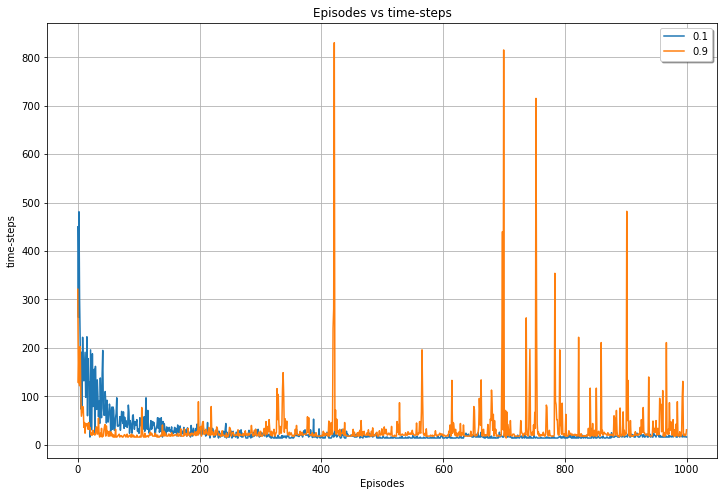

In [179]:
import matplotlib.pyplot as plt
import matplotlib.collections as mcol
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from matplotlib.lines import Line2D

_, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(x_SARSA_54_01, y_SARSA_54_01, label="0.1")
ax.plot(x_SARSA_54_09, y_SARSA_54_09, label="0.9")

ax.set(xlabel='Episodes', ylabel='time-steps',
       title='Episodes vs time-steps')
ax.grid()
ax.legend(shadow=True, fancybox=True)

plt.show()


<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>CONCLUSIONES:</strong>
<br><br>
    <p>En comparación con los valores obtenidos en el ejercicio 4 al momento de ejecutar el episodio siguiendo la política óptima encontrada, vemos que se obtuvo una mejor recompensa con un <i>learning rate</i> de <b>0.5</b>, a continuación, al momento de simular el mismo algoritmo con otros valores, obtuvimos que con un valor de <b>0.1</b> se obtuvo una mejor política óptima en comparación cuando se ejecutó con el parámetros de <b>0.9</b></p>
    <p>Con un <i>learning rate</i> de <b>0.1</b> se obtuvo que el episodio finalizó después de 15 timesteps y una recompensa total de -16; mientras que en el caso de <i>learning rate</i> de <b>0.9</b>, el episodio finalizó después de 17 timesteps obteniendo una recompensa final de -18. Claramente para el algoritmo SARSA, un valor mayor en este parámetro (<i>learning rate</i>) afecta al momento de alcanzar la convergencia, retardándola y por lo tanto necesitando de más pasos para lograrlo.</p>
    <p>Finalmente, lo antes mencionado se confirma con la gráfica <b><u>Episodes vs. time-steps</u></b>, donde se vé que para el valor <i>learning rate</i> de <b>0.1</b> se necesita de una gran cantidad de pasos en los primeros episodios y va disminuyendo al final, lo que también equivale a ser más rápido; por el contrario el <i>learning rate</i> de <b>0.9</b> tiene picos que requieren de un gran número de paso a lo largo de la ejecución de todos los episodios.</p>
</div>